## Manual Backprop Example
Manually take a derivative for an "ANN".

In [48]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

fix the seed so we have reproducable results

In [49]:
rand.seed(9)

Next we will make some data arrays

In [50]:
x = np.array([[-10, -3, -4]], dtype=float)
y = np.array([[0.4, 0.5]], dtype=float)

Also make some random weights and biases for the "ANN"

In [51]:
W = rand.randn(2, 3)
b = rand.randn(2, 1)

Also set the number of epochs we will do our training for and the learning rate

In [52]:
epochs = 500
learning_rate = 0.01

Next we willl run code in loop to predict $\mathbf{y}$ from the function $ \hat{\mathbf{y}} = \textrm{tanh}\left( \mathbf{W} \mathbf{x} + \mathbf{b} \right)$

To do this we will minimize a loss function. Our loss function is  mean squared error between our predictions and the truth:

$$\mathcal{L} = \sum_{i=0}^1{ \left( y_i - \hat{y}_i \right)^2} $$

To minimize our loss we need the partial derivative of the loss with repsect to the parameters $\theta= \begin{bmatrix} \textrm{flatten}\left(\mathbf{W}\right) & \mathbf{b} \end{bmatrix} $:
$$\frac{\partial \mathcal{L}}{\partial \theta}$$


To determine this frist we will define the linear operation inside the tanh.

$$ \textrm{linops} = \mathbf{W} \mathbf{x} + \mathbf{b}$$

And now take the partial derivative of that with repsect to the two output values of linops
$$ \frac{\partial \textrm{linops}_0}{\partial \theta} =  \begin{bmatrix} \mathbf{x} & 1 \\ \mathbf{0} & 0 \end{bmatrix}$$

$$ \frac{\partial \textrm{linops}_1}{\partial \theta} =  \begin{bmatrix} \mathbf{0} & 0\\  \mathbf{x} & 1 \end{bmatrix}$$

Thus the derivative of our loss is:

$$\frac{\partial \mathcal{L}}{\partial \theta}= \sum_{n=0}^1  \left( -2 \left(y_n - \hat{y}_n\right) \left( \left(1- \textrm{tanh}\left(\textrm{linops}_n\right)^2 \right) \frac{\partial \textrm{linops}_n}{\partial \theta} \right)    \right)$$

Finally we update our weights and biases with the derivative
$$\theta_{new} = \theta_{old} - \frac{\partial \mathcal{L}}{\partial \theta} \times \textrm{learning_rate} $$

We repeat the weight updates for each epoch and see what our final loss is

Note: The expected shapes of each numpy array are given in comments for clarity


In [53]:
losses = [] # hold the loss value for each epoch

for epoch in range(epochs):
    linops = np.dot(W, x.transpose()) + b
    # linops.shape = (2,1) => W(2,3) X x(1,3)' + b(2,1)
    
    linops = linops.transpose()
    # linops.shape = (1, 2)
    
    y_hat = np.tanh(linops)
    # y_hat.shape = (1, 2)
    
    loss = np.square(y[:,0]-y_hat[:,0]) + np.square(y[:,1]-y_hat[:,1])
    # loss.shape = (1,)
    
    # save loss to plot
    losses.append(loss)
    
    #if epoch % 10 == 0:
        #print("Loss {0:5.4f}".format(float(loss)))

    # the derivative of linops for y[0] with repect to all 8 parameters
    d_linops_0 = np.hstack([x[:,0], x[:,1], x[:,2], 1, np.zeros((4,))])
    # d_linops.shape = (8,)
    
    # the derivative of linops for y[1] with repsect to all 8 parameters
    d_linops_1 = np.hstack([np.zeros((4,)), x[:,0], x[:,1], x[:,2], 1])
    # d_linops.shape = (8,)

    d_linops = np.concatenate([d_linops_0[:, None], d_linops_1[:, None]], axis=1)
    
    # will hold all our the derivative of our loss with respect to all parameters (Weights and biases)
    d_loss = np.zeros((1, 8))
    # d_loss.shape = (1, 8)

    # loop over all parameters
    for i in range(8):
        # this line is doing two sums which is summing over n
        d_loss[:, i] = (-2 *(y[:,0]-y_hat[:, 0]) * (1 - np.square(np.tanh(linops)))[:, 0] * d_linops[i, 0]) + \
            (-2 *(y[:,1]-y_hat[:, 1]) * (1 - np.square(np.tanh(linops)))[:, 1] * d_linops[i, 1])
    
    # this is where we do the sum over first dim to get rid of it (usually this is the number of samples in a batch
    # but we only have one sample)
    d_loss = np.mean(d_loss, axis=0)
    
    # Update Weights
    W = W - np.concatenate([d_loss[:3][None,:], d_loss[4:-1][None, :]], axis=0) * learning_rate
    b = b - np.array([d_loss[3], d_loss[-1]]).reshape((2, 1)) * learning_rate
    

Now lets plot our loss over each epoch and check our final prediction $\hat{\mathbf{y}}$

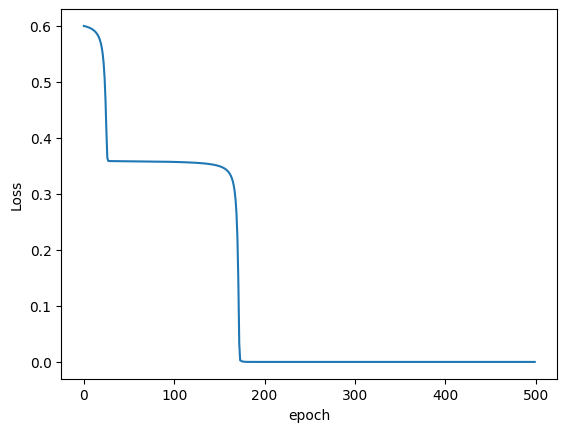

In [54]:
plt.clf()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()

Look our loss in this example went zero.
Thus our final result is exactly right. This happened because  we only had one sample and which should be easy to memorize. In general a perfect prediction is actually bad because you usually don't want to memorize the input output pairs. Memorization would lead to poor generalization to new future input.

In [55]:
y_hat

array([[0.4, 0.5]])

Numpy agrees that all the values in each array are close to each other

In [56]:
np.allclose(y_hat, y)

True

$\hat{y} = f(x| \theta)$